# Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Read data

In [106]:
ds = pd.read_csv('vax_malaysia.csv')

In [89]:
ds.head()

,date,dose1_daily,dose2_daily,total_daily,dose1_cumul,dose2_cumul,total_cumul
0,2021-02-24,60,0,60,60,0,60
1,2021-02-25,1153,0,1153,1213,0,1213
2,2021-02-26,4086,0,4086,5299,0,5299
3,2021-02-27,6712,0,6712,12011,0,12011
4,2021-02-28,6683,3,6686,18694,3,18697


In [90]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         128 non-null    object
 1   dose1_daily  128 non-null    int64 
 2   dose2_daily  128 non-null    int64 
 3   total_daily  128 non-null    int64 
 4   dose1_cumul  128 non-null    int64 
 5   dose2_cumul  128 non-null    int64 
 6   total_cumul  128 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.1+ KB


In [91]:
ds['date'] = pd.to_datetime(ds['date'], format="%Y/%m/%d")

In [92]:
ds.head(10)

,date,dose1_daily,dose2_daily,total_daily,dose1_cumul,dose2_cumul,total_cumul
0,2021-02-24,60,0,60,60,0,60
1,2021-02-25,1153,0,1153,1213,0,1213
2,2021-02-26,4086,0,4086,5299,0,5299
3,2021-02-27,6712,0,6712,12011,0,12011
4,2021-02-28,6683,3,6686,18694,3,18697
5,2021-03-01,15357,4,15361,34051,7,34058
6,2021-03-02,21658,4,21662,55709,11,55720
7,2021-03-03,22636,5,22641,78345,16,78361
8,2021-03-04,19527,10,19537,97872,26,97898
9,2021-03-05,14128,2,14130,112000,28,112028


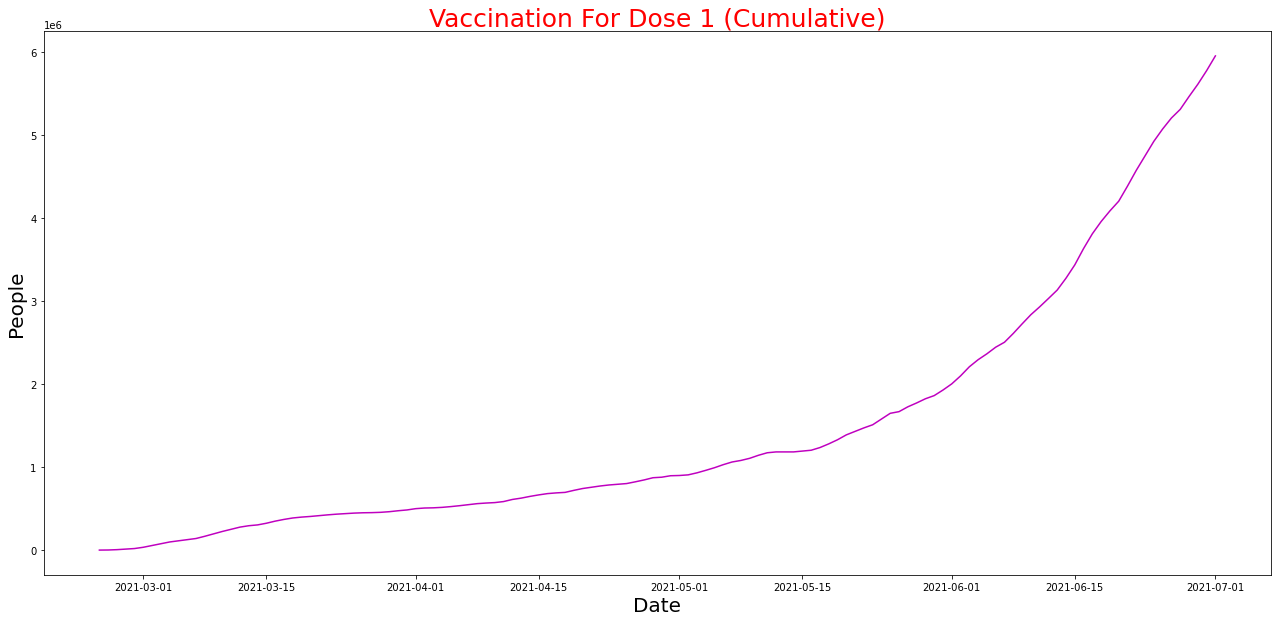

In [93]:
plt.figure(figsize=(22,10))
plt.plot(ds.date,ds.dose1_cumul, color='m')
plt.title("Vaccination For Dose 1 (Cumulative)", fontsize=25, fontweight=10, color='red')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("People", fontsize = 20)
plt.show()

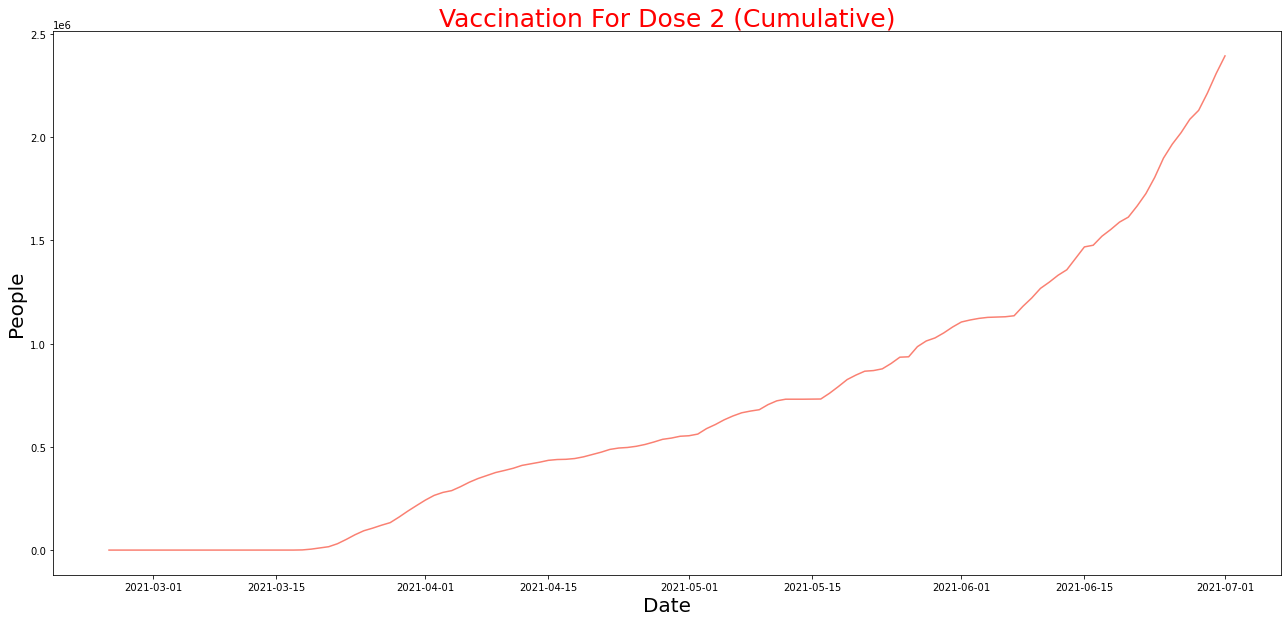

In [94]:
plt.figure(figsize=(22,10))
plt.plot(ds.date,ds.dose2_cumul, color='salmon')
plt.title("Vaccination For Dose 2 (Cumulative)", fontsize=25, fontweight=10, color='red')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("People", fontsize = 20)
plt.show()

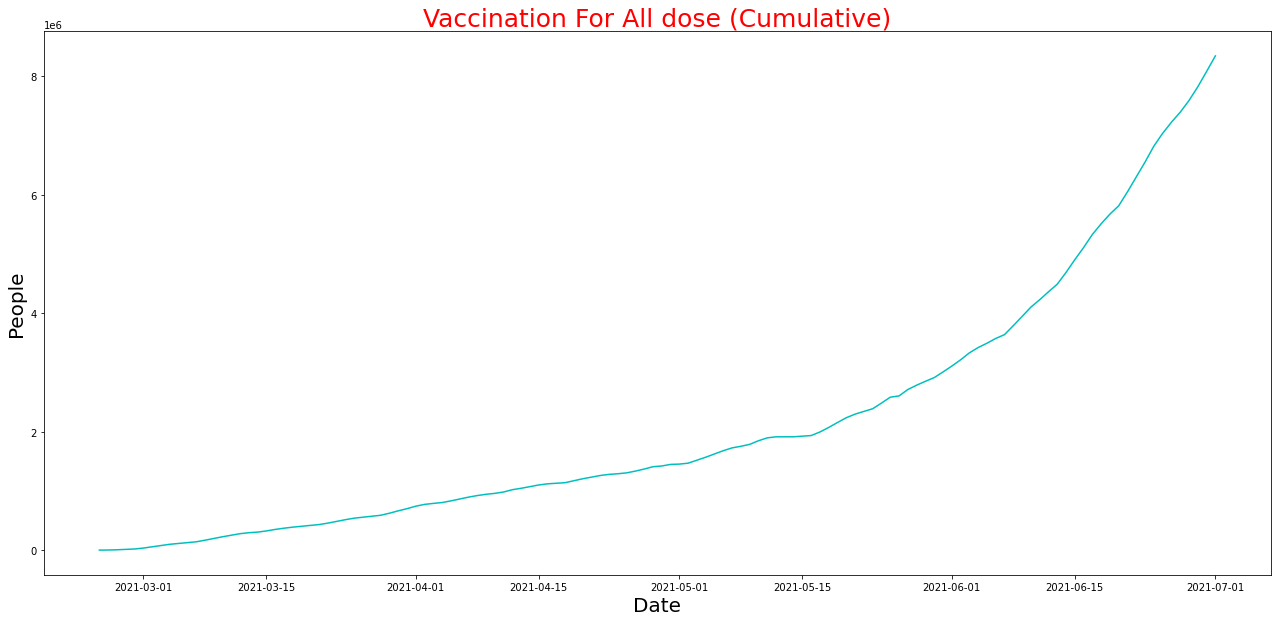

In [95]:
plt.subplots(figsize=(22,10))
plt.plot(ds.date,ds.total_cumul, color='c')
plt.title("Vaccination For All dose (Cumulative)", fontsize=25, fontweight=10, color='red')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("People", fontsize = 20)
plt.show()

In [96]:
ds['Year'] = ds['date'].dt.year
ds['Month'] = ds['date'].dt.month
ds['Day'] = ds['date'].dt.day

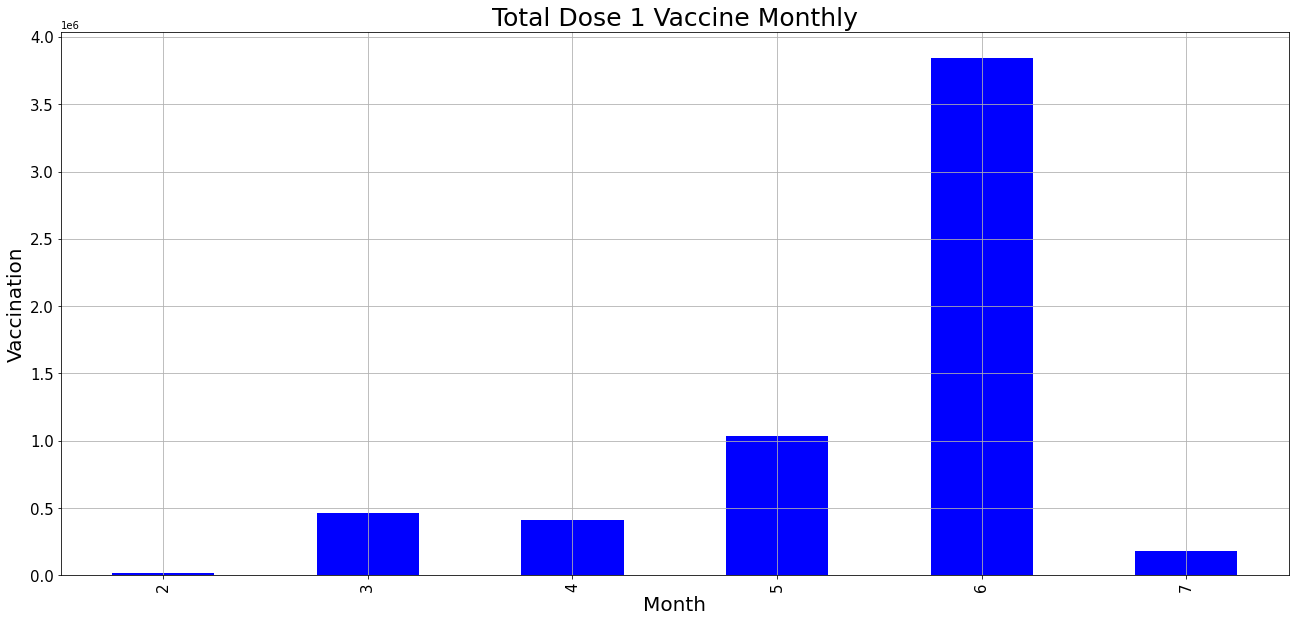

In [97]:
monthlydose1 = ds.groupby('Month')['dose1_daily'].sum()

plt.subplots(figsize=(22,10))
monthlydose1.sort_index().plot(kind='bar', color='blue', fontsize = 15)
plt.title('Total Dose 1 Vaccine Monthly', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Vaccination', fontsize = 20)
plt.grid()
plt.show()

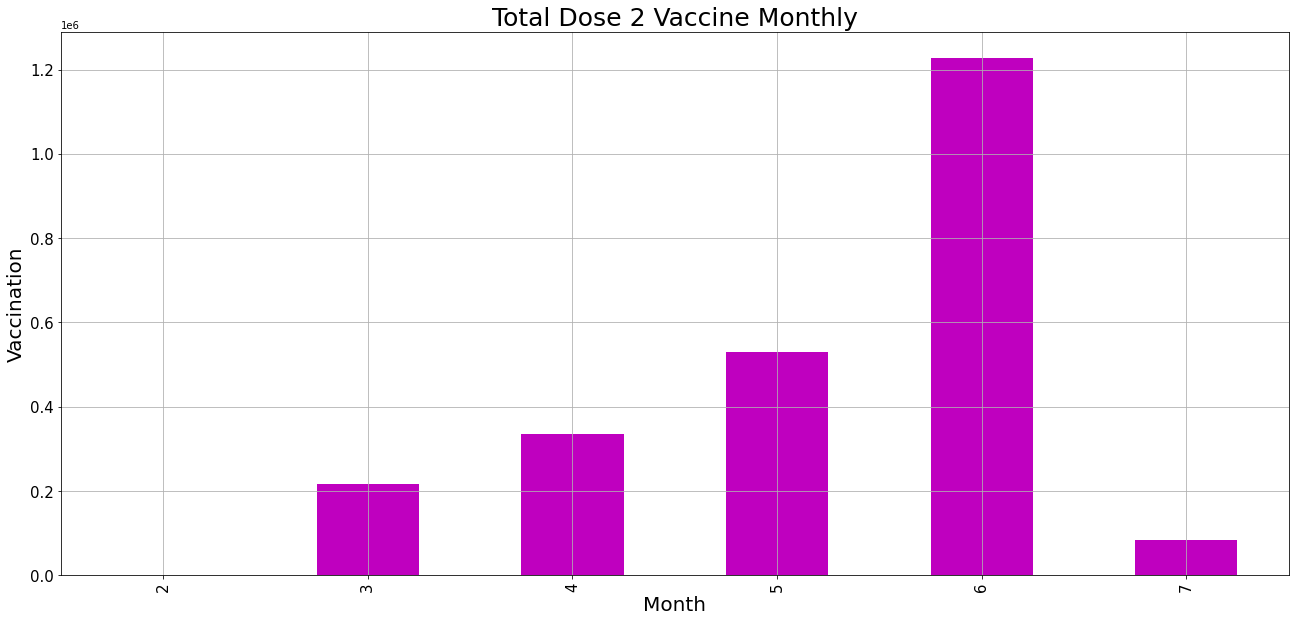

In [101]:
monthlydose2 = ds.groupby('Month')['dose2_daily'].sum()

plt.subplots(figsize=(22,10))
monthlydose2.sort_index().plot(kind='bar', color='m', fontsize = 15)
plt.title('Total Dose 2 Vaccine Monthly', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Vaccination', fontsize = 20)
plt.grid()
plt.show()

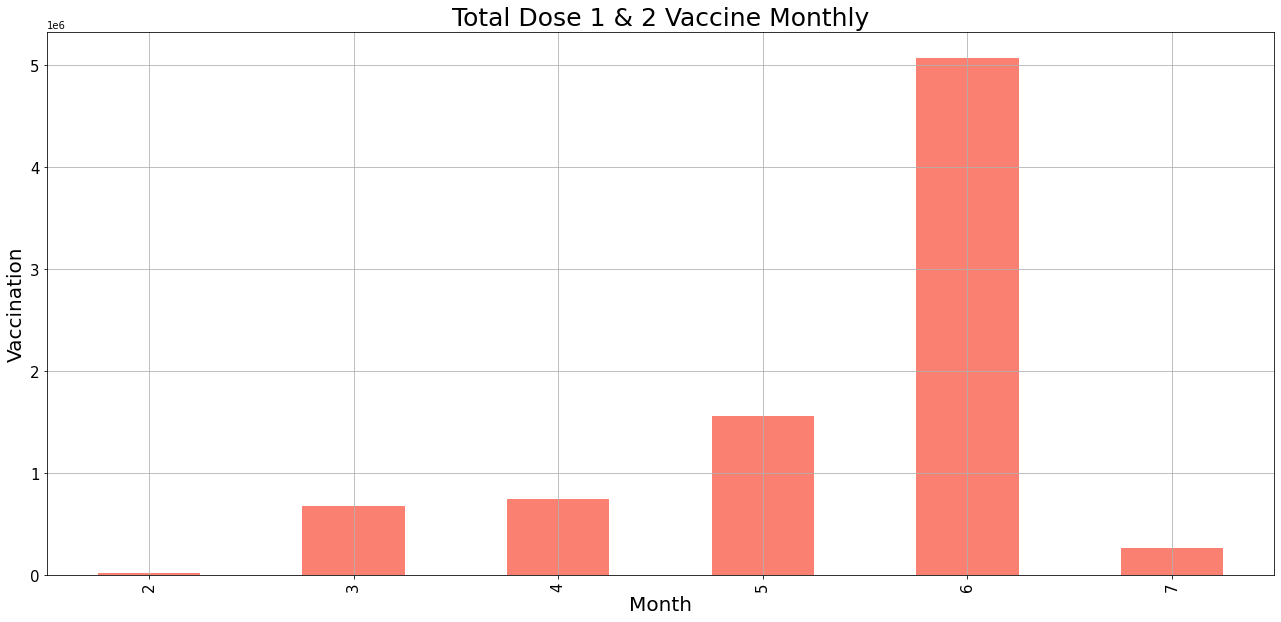

In [104]:
monthlytotaldose = ds.groupby('Month')['total_daily'].sum()

plt.subplots(figsize=(22,10))
monthlytotaldose.sort_index().plot(kind='bar', color='salmon', fontsize = 15)
plt.title('Total Dose 1 & 2 Vaccine Monthly', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Vaccination', fontsize = 20)
plt.grid()
plt.show()